In [27]:
from bsp_epidemic_suppression_model.utilities.model import R0, r0, FS, r0_alpha, r0_beta
from bsp_epidemic_suppression_model.algorithm.model_blocks import (
    suppressed_r_from_test_cdf,
)
from bsp_epidemic_suppression_model.utilities.plotting_utils import plot_functions
from bsp_epidemic_suppression_model.utilities.functions_utils import RealRange
import scipy.integrate as integrate
from numpy import heaviside

In [2]:
tau_max = 30
step = 0.05

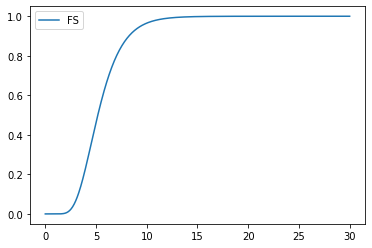

E(tauS) = 5.528321470814886


In [10]:
# Symptoms onset distribution
plot_functions([FS], RealRange(x_min=0, x_max=tau_max, step=step), labels=['FS'])
EtauS = integrate.quad(lambda tau: (1-FS(tau)), 0, tau_max)[0]  # Expected time of symptomes onset for symptomatics
print("E(tauS) =",EtauS)

### Symptoms-based only R suppression

suppressed R_0 = 0.5198297398867665


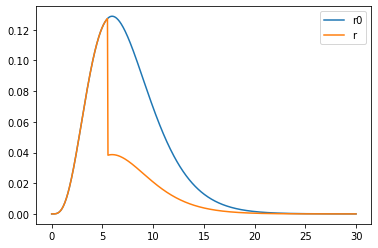

In [17]:
# Approximating FS as heaviside

tau_s = 5.53
FT = lambda tau: heaviside(tau - tau_s, 1)
xi = 0.7  # Probability of (immediate) isolation given positive test

suppressed_r_0 = suppressed_r_from_test_cdf(r0, FT, xi)


suppressed_R_0 = integrate.quad(lambda tau: suppressed_r_0(tau), 0, tau_max)[0]
print("suppressed R_0 =", suppressed_R_0)

plot_functions([r0, suppressed_r_0], RealRange(x_min=0, x_max=tau_max, step=step), labels=['r0', 'r'])

suppressed R_0 = 0.5217335716523748


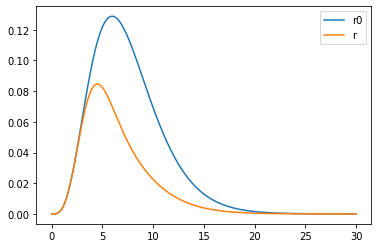

In [7]:
# Using true FS

FT = FS
xi = 0.7  # Probability of (immediate) isolation given positive test

suppressed_r_0 = suppressed_r_from_test_cdf(r0, FT, xi)


suppressed_R_0 = integrate.quad(lambda tau: suppressed_r_0(tau), 0, tau_max)[0]
print("suppressed R_0 =", suppressed_R_0)

plot_functions([r0, suppressed_r_0], RealRange(x_min=0, x_max=tau_max, step=step), labels=['r0', 'r'])

### R suppression including ss and DeltaAT

suppressed R_0 = 0.646235339399311


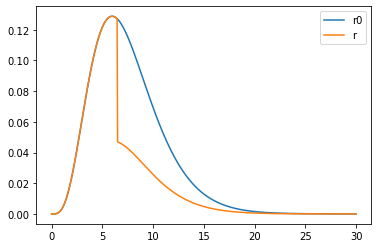

In [32]:
# Approximating FS as heaviside
tau_s = 4.5 # 5.53
Deltat_test=2
ss = 0.7

xi = 0.9  # Probability of (immediate) isolation given positive test

FT = lambda tau: ss * heaviside(tau - tau_s - Deltat_test, 1)
suppressed_r_0 = suppressed_r_from_test_cdf(r0, FT, xi)
suppressed_R_0 = integrate.quad(lambda tau: suppressed_r_0(tau), 0, tau_max)[0]
print("suppressed R_0 =", suppressed_R_0)

plot_functions([r0, suppressed_r_0], RealRange(x_min=0, x_max=tau_max, step=step), labels=['r0', 'r'])

In [28]:
# Direct computation
from bsp_epidemic_suppression_model.utilities.distributions import gamma_cdf
r0_alpha = 4.865916955
r0_beta = 0.6487889273

tau_s = 4.5 # 5.53
Deltat_test=2

ss = 0.7

xi = 0.9  # Probability of (immediate) isolation given positive test

ts = tau_s + Deltat_test
r_frac_within_ts = gamma_cdf(ts, alpha=r0_alpha, beta=r0_beta)
suppressed_R_0 = R0 * (r_frac_within_ts + (1 - xi * ss) * (1- r_frac_within_ts))
print("suppressed R_0 =", suppressed_R_0)

suppressed R_0 = 0.6462432112762181


suppressed R_0 = 0.7058817123602943


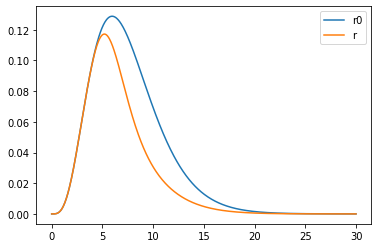

In [19]:
# Using true FS
Deltat_test=2
ss = 0.7

xi = 0.9  # Probability of (immediate) isolation given positive test

FT = lambda tau: ss * FS(tau - Deltat_test)
suppressed_r_0 = suppressed_r_from_test_cdf(r0, FT, xi)
suppressed_R_0 = integrate.quad(lambda tau: suppressed_r_0(tau), 0, tau_max)[0]
print("suppressed R_0 =", suppressed_R_0)

plot_functions([r0, suppressed_r_0], RealRange(x_min=0, x_max=tau_max, step=step), labels=['r0', 'r'])